Life cycle of Machine learning Project
*Understanding the Problem Statement

*Data Collection

*Data Checks to perform

*Exploratory data analysis

*Data Pre-Processing

*Model Training

*Choose best model

1) Problem statement

    This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection

   Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages

   Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [ ]:
df=pd.read_csv('/config/workspace/notebook/students-performance-in-exams/StudentsPerformance.csv')

Show top 5 and bottom 5 rows

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


shape of the dataset

In [16]:
df.shape

(1000, 8)

2.2 Dataset information

   gender : sex of students -> (Male/female)

   race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

   parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
  
   lunch : having lunch before test (standard or free/reduced)
  
   test preparation course : complete or not complete before test
  
   math score
  
   reading score
  
   writing score


3.Data Checks to perform

  Check Missing values

  Check Duplicates

  Check data type

  Check the number of unique values of each column

  Check statistics of data set

  Check various categories present in the different categorical column

3.1 Check Missing values

In [18]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the data set


3.2 Check Duplicates

In [19]:
df.duplicated().sum()

0

There are no duplicates values in the data set

3.3 Check data types

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique values of each column

In [21]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5 Check statistics of data set

In [22]:

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



Insight


  From above description of numerical data, all means are very close to each other - between 66 and 68.05;
  
  All standard deviations are also close - between 14.6 and 15.19;
  
  While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17


3.7 Exploring Data

In [41]:
def get_unique(df):
    columns=df.select_dtypes(include='object')
    for col in columns.columns:
        unique_values=df[col].unique()
        unique_count=len(unique_values)
        print('unique  values for column {} are {} and total {}'.format(col,unique_values,unique_count))

In [42]:
get_unique(df)

unique  values for column gender are ['female' 'male'] and total 2
unique  values for column race/ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E'] and total 5
unique  values for column parental level of education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] and total 6
unique  values for column lunch are ['standard' 'free/reduced'] and total 2
unique  values for column test preparation course are ['none' 'completed'] and total 2


3.8 Adding columns for "Total Score" and "Average"

In [46]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average score']=df['total score']/3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,229,76.333333
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,223,74.333333


In [49]:
reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [50]:
reading_less_20 = df[df['reading score'] <= 20]['average score'].count()
writing_less_20 = df[df['writing score'] <= 20]['average score'].count()
math_less_20 = df[df['math score'] <= 20]['average score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights

From above values we get students have performed the worst in Maths

Best performance is in reading section

4. Exploring Data ( Visualization )

4.1 Visualize average score distribution to make some conclusion.

Histogram

Kernel Distribution Function (KDE)

4.1.1 Histogram & KDE

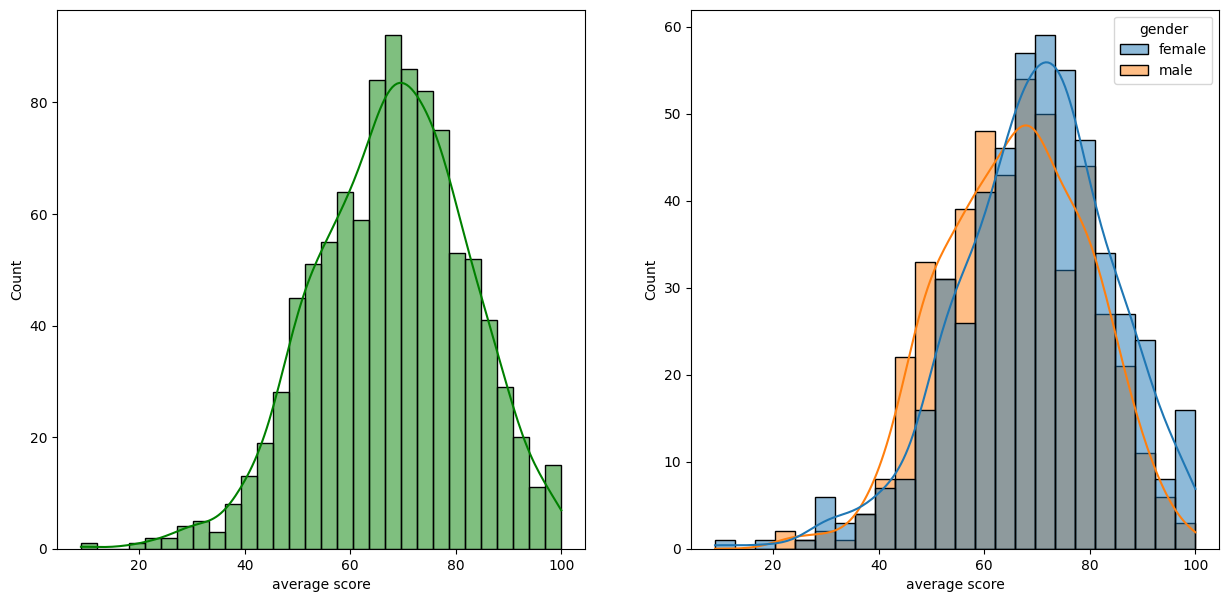

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='gender')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()